# Object Detection

**Authors:**

- [Angus Mackenzie](https://github.com/AngusTheMack) ([1106817](mailto:1106817@students.wits.ac.za))
- [Nathan Michlo](https://github.com/nmichlo) ([1386161](mailto:1386161@students.wits.ac.za))

**Achievement** Detecting the bounding box of snakes within images to better perform classification later on.

## Introduction
This notebook is based off of techniques from [this article](https://medium.com/@Stormblessed/2460292bcfb) and [this repo](https://github.com/GokulEpiphany/contests-final-code/tree/master/aicrowd-snake-species) by .

----------------------

In [9]:
# Utilities
import sys
import os
from tqdm.notebook import tqdm
import imageio
import matplotlib.pyplot as plt
from fastai.vision.data import ImageList
import json
from pprint import pprint

# Add root of project to PYTHON_PATH so we can import correctly
if os.path.abspath('../') not in {os.path.abspath(path) for path in sys.path}:
    sys.path.insert(0, os.path.abspath('../'))
    
# Import SSIC common stuffs
from ssic.ssic import SSIC
from ssic.util import set_random_seed, cache_data

# if you dont have a .env file set it here
os.environ.setdefault('DATASET_DIR', '~/downloads/datasets/ssic')

# Initialise SSIC paths, data and other stuffs, searches for a .env file in the project with these variables specified, also checkpoints os.environ and sys.path
SSIC.init()

[RESTORED]: os.environ
[LOADED]: 
[RESTORED]: sys.path
[STORAGE_DIR]: /home/nmichlo/workspace/snake-id/notebooks/out
[DATASET_DIR]: /home/nmichlo/downloads/datasets/ssic
[DATASET_CLASS_CSV]: /home/nmichlo/downloads/datasets/ssic/class_idx_mapping.csv
[DATASET_TRAIN_DIR]: /home/nmichlo/downloads/datasets/ssic/train
[DATASET_TEST_DIR]: /home/nmichlo/downloads/datasets/ssic/round1


## User Setup

**DATASETS FROM**: https://medium.com/@Stormblessed/2460292bcfb

**INSTRUCTIONS**: 
Download both of the following into the `DATASET_DIR` above, then extract the dataset into that same directory **take care** all the images are not inside a folder within the zip.
 - labeled dataset: https://drive.google.com/file/d/1q14CtkQ9r7rlxwLuksWAOduhDjUb-bBE/view
 - drive link:      https://drive.google.com/file/d/18dx_5Ngmc56fDRZ6YZA_elX-0ehtV5U6/view

## Code

In [16]:
# LOAD IMAGES:
IMAGES_DIR = os.path.join(SSIC.DATASET_DIR, 'train-object-detect')
assert os.path.isdir(IMAGES_DIR)
imagelist = ImageList.from_folder(IMAGES_DIR)

# LOAD ANNOTATIONS:
ANNOTATIONS_PATH = os.path.join(SSIC.DATASET_DIR, 'annotations.json')
assert os.path.isfile(ANNOTATIONS_PATH)
with open(ANNOTATIONS_PATH, 'r') as file:
    ANNOTATIONS = json.load(file)

{'annotations': [{'class': 'rect',
                  'height': 1204.4159999999997,
                  'width': 1290.8159999999996,
                  'x': 12.095999999999997,
                  'y': 101.95199999999997}],
 'class': 'image',
 'filename': '000ded5244ce4e2f6e6110cdb57f161e.jpg'}


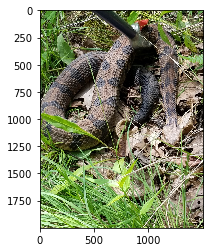

In [18]:
# Show One Example
pprint(ANNOTATIONS[0])
plt.imshow(imageio.imread(SSIC.get_train_image_info()[ANNOTATIONS[0]['filename']]['path']))

In [ ]:
class SnakeDetector(nn.Module):
    def __init__(self, arch=models.resnet18):
        super().__init__() 
        self.cnn = create_body(arch)
        self.head = create_head(num_features_model(self.cnn) * 2, 4)
        
    def forward(self, im):
        x = self.cnn(im)
        x = self.head(x)
        return 2 * (x.sigmoid_() - 0.5)

def loss_fn(preds, targs, class_idxs):
    return L1Loss()(preds, targs.squeeze())